## Observations and Insights 
- The drug regimen Capomulin and Ramicane has the highest total timepoint indicating both were used more compare to other drugs
- The number of female and male mice used in the study are relative close (almost equally distributed)
- There is a strong correlation between mouse weight and average tumor volume for the Capomulin regimen


In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import scipy.stats as st
from scipy.stats import linregress

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path  = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

#Combine the data into a single dataset 

combined_df = pd.merge( mouse_metadata
                      , study_results
                      , how="outer"
                      , on=["Mouse ID"]
                      )
# Display the data table for preview
combined_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


# Prepare the data

In [2]:
# Checking the number of mice.
number_of_mice = combined_df["Mouse ID"].nunique()
number_of_mice 

249

In [3]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
dups_mouse_id = combined_df[
                            combined_df.duplicated(subset=["Mouse ID","Timepoint"]) 
                           ]

In [4]:
# Optional: Get all the data for the duplicate mouse ID. 
dups_mouse_id 

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
909,g989,Propriva,Female,21,26,0,45.000000,0
911,g989,Propriva,Female,21,26,5,47.570392,0
913,g989,Propriva,Female,21,26,10,49.880528,0
915,g989,Propriva,Female,21,26,15,53.442020,0
917,g989,Propriva,Female,21,26,20,54.657650,1


In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
no_dups_df = combined_df.drop_duplicates(subset = ["Mouse ID","Timepoint"], keep = 'last')
no_dups_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [6]:
# Checking the number of mice in the clean DataFrame.
no_dups_df["Mouse ID"].nunique()

249

## Summary Statistics

In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume 
# for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 

# Create a df groupby Drug Regimen
drug_regimen_groupby_df         = no_dups_df.groupby(["Drug Regimen"])

# Create the series for Drug Regimen's mean, median, variance, standard deviation, and SEM of the tumor volume.
mean_drug_regimen_series        = drug_regimen_groupby_df.mean() ["Tumor Volume (mm3)" ]  
median_drug_regimen_series      = drug_regimen_groupby_df.median() ["Tumor Volume (mm3)" ]
var_drug_regimen_series         = drug_regimen_groupby_df.var() ["Tumor Volume (mm3)" ]
std_drug_regimen_series         = drug_regimen_groupby_df.std() ["Tumor Volume (mm3)" ]
sem_drug_regimen_series         = drug_regimen_groupby_df.sem() ["Tumor Volume (mm3)" ]   

# Assemble the resulting series into a single summary dataframe.
# Rename the series column name using to_frame
summary_tumor_by_drug_regimen_df = pd.concat([  mean_drug_regimen_series.to_frame  ("mean - Tumor Volume (mm3)")
                                              , median_drug_regimen_series.to_frame("median - Tumor Volume (mm3)")
                                              , var_drug_regimen_series.to_frame   ("var - Tumor Volume (mm3)")
                                              , std_drug_regimen_series.to_frame   ("std - Tumor Volume (mm3)")
                                              , sem_drug_regimen_series.to_frame   ("sem - Tumor Volume (mm3)")
                                              ], axis=1)

summary_tumor_by_drug_regimen_df

,mean - Tumor Volume (mm3),median - Tumor Volume (mm3),var - Tumor Volume (mm3),std - Tumor Volume (mm3),sem - Tumor Volume (mm3)
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.382993,50.783528,43.220205,6.574208,0.526358
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [8]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume 
# for each regimen

# Using the aggregation method, produce the same summary statistics in a single line
tumor_by_drug_regimen_agg = no_dups_df.groupby('Drug Regimen').agg({ "Tumor Volume (mm3)" :[ 'mean'
                                                                                           , 'median'
                                                                                           , 'var'
                                                                                           , 'std'
                                                                                           , 'sem'  
                                                                                           ]})

tumor_by_drug_regimen_agg

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.382993  50.783528  43.220205  6.574208  0.526358
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

### Create the df needed to create the bar charts

In [9]:
# Create the groupby df and series needed to create the bar chart showing the total number of timepoints for 
# all mice tested for each drug regimen
drug_regimen_df = no_dups_df.groupby(["Drug Regimen"])

# Get the count of each Drug regimen
total_timepoint = drug_regimen_df['Timepoint'].count()

### Using pandas, create the bar chart of total number of timepoints for all mice tested for each drug regimen

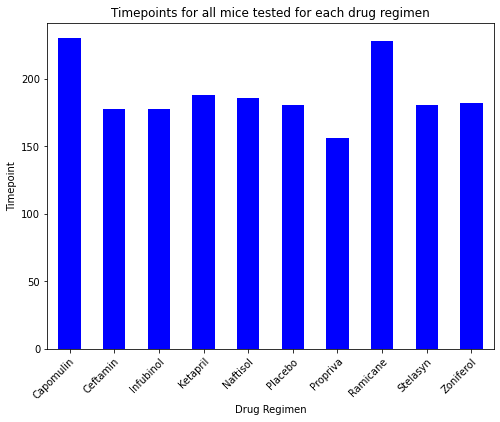

In [10]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas.

timepoint_chart = total_timepoint.plot( kind      = "bar"
                                      , facecolor = "blue"
                                      , figsize   = (8,6)
                                      , title     = "Timepoints for all mice tested for each drug regimen"
                                      , xlabel    = "Drug Regimen"
                                      , ylabel    = "Timepoint"
                                      )

# Set the ticklabels, Note: The total_timepoint.index has the list of Drug Regimen
xticklabels       = total_timepoint.index
timepoint_chart.set_xticklabels( xticklabels
                               , rotation      = 45
                               , rotation_mode = "anchor"
                               , ha            = "right"
                               , wrap          = True
                               )
# Show plot
plt.show()

### Using pyplot, create the bar chart of total number of timepoints for all mice tested for each drug regimen

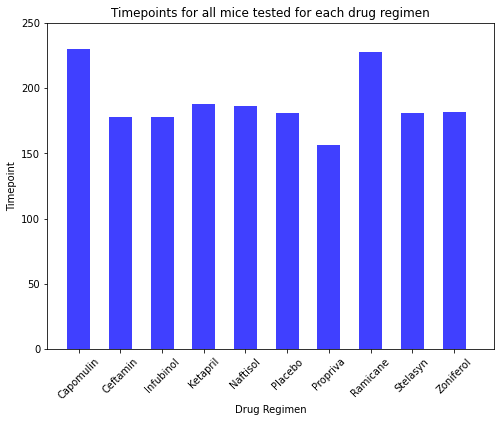

In [11]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using pyplot.

# Set the x_axis (drug_regimen) and y_axis (total_timepoint)
x_axis_drug      = np.arange(0, len(drug_regimen_df))
y_axis_timepoint = total_timepoint

# Set the tick locations
tick_locations = []
for x in x_axis_drug:
    tick_locations.append(x)
    
# Set the chart size
plt.figure(figsize=(8,6))

# Set the chart title, x and y label
plt.title("Timepoints for all mice tested for each drug regimen" )
plt.xlabel("Drug Regimen")
plt.ylabel("Timepoint")

# Set the chart x and y limit
plt.xlim(-0.75, len(drug_regimen_df)-.05)
plt.ylim(0, max( total_timepoint) + 20)

# Create the bar chart; where x_axis is the drug_regimen and y_axis is the total_timepoint
plt.bar( x_axis_drug
       , y_axis_timepoint
       , facecolor="blue", alpha=0.75, align="center", width=0.55)

# Set the label locations(x_axis) and text labels (y_axis.index) and text labels and properties 
# Note: The total_timepoint.index has the list of Drug Regimen
plt.xticks( tick_locations
          , y_axis_timepoint.index
          ,rotation=45)
plt.show()

### Create the df needed to create the pie charts

In [12]:
# Create the groupby df and series needed to create pie plot showing the distribution of female versus male mice 
sex_df = no_dups_df.groupby(["Sex"])

# Get the total count per sex 
sex_count = sex_df["Sex"].count()

### Using pandas, create the pie chart showing the distribution of female versus male mice 

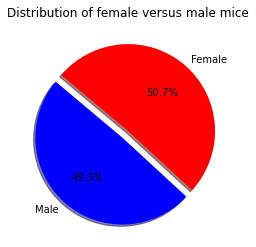

In [13]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas

# Set the labels and colors for the sections of our pie chart
labels = ["Male", "Female"]
colors = ["blue", "red"]

# Tells matplotlib to separate the "Humans" section from the others
explode = (0.1, 0)

# Create the chart
sex_chart1 = sex_count.plot( kind       = 'pie'
                           , explode    = explode
                           , labels     = labels
                           , colors     = colors
                           , autopct    = "%1.1f%%"
                           , shadow     = True
                           , startangle = 140
                           , title     = "Distribution of female versus male mice"
                           )

# Set the y axis lable 
plt.ylabel('')                    
                                  
# Show plot 
plt.show()

### Using pyplot, create the pie chart showing the distribution of female versus male mice 

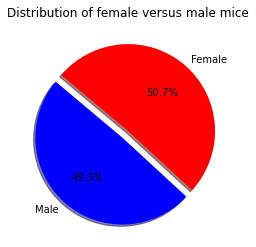

In [14]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

# Set the labels and colors for the sections of our pie chart
labels2 = ["Male", "Female"]
colors2 = ["blue", "red"]

# Tells matplotlib to separate the "Humans" section from the others
explode2 = (0.1, 0)

# Creates the pie chart based upon the values above
# Automatically finds the percentages of each part of the pie chart
plt.pie( sex_count
       , explode    = explode2
       , labels     = labels2
       , colors     = colors2
       , autopct    = "%1.1f%%"
       , shadow     = True
       , startangle = 140)

# Set chart title
plt.title('Distribution of female versus male mice')

# Show plot
plt.show()

## Quartiles, Outliers and Boxplots

In [15]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
mouse_groupby_df = no_dups_df.groupby(["Mouse ID"]) 
max_timepoint    = mouse_groupby_df["Timepoint"].max()

# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
merge_max_timepoint_df = pd.merge( no_dups_df
                                 , max_timepoint   
                                 , how="outer"
                                 , on=["Mouse ID"]
                                 )
# Rename the column name of Timepoint_x and Timepoint_y
merge_max_timepoint_df = merge_max_timepoint_df.rename(columns={"Timepoint_x" : "Timepoint"
                                                               ,"Timepoint_y" : "Max Timepoint"})

# Get the tumor volume of the row with max timepoints for each mouse id
latest_timepoint_df = merge_max_timepoint_df.drop_duplicates(subset = [ 'Mouse ID'
                                                                      , 'Drug Regimen'
                                                                      , 'Max Timepoint']
                                                                      , keep = 'last')
latest_timepoint_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites,Max Timepoint
9,k403,Ramicane,Male,21,16,45,22.050126,1,45
19,s185,Capomulin,Female,3,17,45,23.343598,1,45
29,x401,Capomulin,Female,16,15,45,28.484033,0,45
39,m601,Capomulin,Male,22,17,45,28.430964,1,45
49,g791,Ramicane,Male,11,16,45,29.128472,1,45
...,...,...,...,...,...,...,...,...,...
1854,z314,Stelasyn,Female,21,28,5,45.934712,0,5
1857,z435,Propriva,Female,12,26,10,48.710661,0,10
1867,z581,Infubinol,Female,24,25,45,62.754451,3,45
1877,z795,Naftisol,Female,13,29,45,65.741070,3,45


In [16]:
# Put treatments into a list for for loop (and later for plot labels)
treatments = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

# Create empty list to fill with tumor vol data (for plotting)
volumes = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 

for treatment in treatments:     
    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    volume = latest_timepoint_df.loc[ latest_timepoint_df["Drug Regimen"] == treatment
                                    , "Tumor Volume (mm3)"]     
      
    # add subset  
    volumes.append(volume)
    
    # Determine outliers using upper and lower bounds
    quartiles = volume.quantile([.25,.5,.75])  
    lowerq    = quartiles[0.25]
    upperq    = quartiles[0.75]
    iqr       = upperq-lowerq
    print(f"Data for treatment {treatment} ------------------------")
    print(f"The lower quartile of volumes is     : {lowerq}")
    print(f"The upper quartile of volumes is     : {upperq}")
    print(f"The interquartile range of volumes is: {iqr}")
    print(f"The the median of volumes is         : {quartiles[0.5]} ")

    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)
    print(f"Values below {lower_bound} could be outliers.")
    print(f"Values above {upper_bound} could be outliers.")
    print(f" ")

Data for treatment Capomulin ------------------------
The lower quartile of volumes is     : 32.37735684
The upper quartile of volumes is     : 40.1592203
The interquartile range of volumes is: 7.781863460000004
The the median of volumes is         : 38.1251644 
Values below 20.70456164999999 could be outliers.
Values above 51.83201549 could be outliers.
 
Data for treatment Ramicane ------------------------
The lower quartile of volumes is     : 31.56046955
The upper quartile of volumes is     : 40.65900627
The interquartile range of volumes is: 9.098536719999998
The the median of volumes is         : 36.56165229 
Values below 17.912664470000003 could be outliers.
Values above 54.30681135 could be outliers.
 
Data for treatment Infubinol ------------------------
The lower quartile of volumes is     : 54.04860769
The upper quartile of volumes is     : 65.52574285
The interquartile range of volumes is: 11.477135160000003
The the median of volumes is         : 60.16518046 
Values below 3

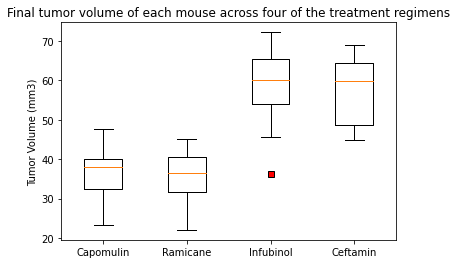

In [17]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest

# Set the marker shape and color
red_square = dict(markerfacecolor='r', marker='s')

# Set subplot
fig1, ax1  = plt.subplots()

# Set the title and y label
ax1.set_title('Final tumor volume of each mouse across four of the treatment regimens')
ax1.set_ylabel('Tumor Volume (mm3)')

# Create the boxplot
ax1.boxplot(volumes, flierprops=red_square)

# Set the tick locations
x_axis   = np.arange(0, len(treatments))
tick_loc = []
for x in x_axis:
    x += 1
    tick_loc.append(x)
    
# Set the x label
ax1.set_xticks(tick_loc,labels=treatments)    
plt.show()

## Line and Scatter Plots

### Line plot of tumor volume vs. time point for a mouse treated with Capomulin

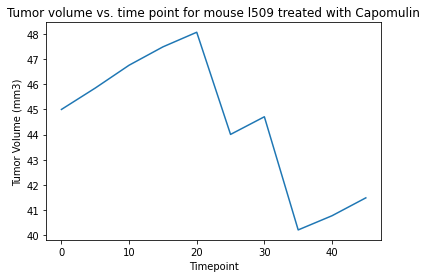

In [18]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin

# Set the variable for mouse id and drug
mouse = "l509" 
drug  = "Capomulin"

# Create the df for a specific mouse and drug
one_drug_df = no_dups_df.loc[ (no_dups_df["Drug Regimen"] == drug  ) &
                              (no_dups_df["Mouse ID"]     == mouse )
                              , ["Mouse ID","Tumor Volume (mm3)", "Timepoint"]
                             ]

# Create the array of tumor volume and timepoint 
tumor_array     = one_drug_df["Tumor Volume (mm3)" ].to_numpy()
timepoint_array = one_drug_df["Timepoint" ].to_numpy()

# Create the line char for timepoint vs tumor
plt.plot(timepoint_array, tumor_array)

# Set the title, x and y label
plt.title(f'Tumor volume vs. time point for mouse {mouse} treated with {drug}')
plt.xlabel('Timepoint')
plt.ylabel('Tumor Volume (mm3)')
plt.show()

### Scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen

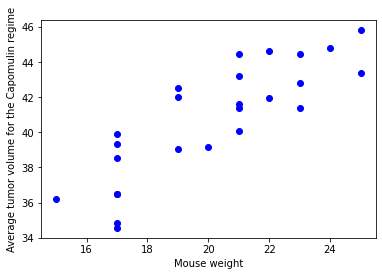

In [19]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen

# Create a df for Capomulin regimen
drug_var    = "Capomulin"
drug_var_df = no_dups_df.loc[ (no_dups_df["Drug Regimen"] == drug_var )
                              , ["Mouse ID","Tumor Volume (mm3)", "Weight (g)"]
                            ]

# Get the mouse weight and average tumor volume for the Capomulin regimen
groupby_mouse_df      = drug_var_df.groupby(["Mouse ID"])

# Get the tumor_volume mean
mean_tumor_volume     = groupby_mouse_df.mean() ["Tumor Volume (mm3)" ]  

# Get the mouse_weight mean. This will give the same value of the mouse weight
mean_mouse_weight     = groupby_mouse_df.mean() ["Weight (g)" ]  

# dups ? del Compare the calcualted Pearson's r to the plots 
plt.scatter( mean_mouse_weight
           , mean_tumor_volume
           , color = 'blue'
           )

# Set the x and y label
plt.xlabel('Mouse weight')
plt.ylabel(f'Average tumor volume for the {drug_var} regime')
plt.show()

## Correlation and Regression

The correlation between both factors is 0.84


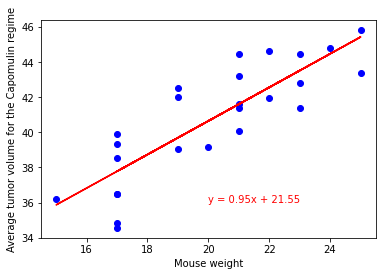

In [20]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen

# Compute the Pearson correlation coefficient between mouse weight and average tumor volume 
correlation = st.pearsonr( mean_mouse_weight
                         , mean_tumor_volume 
                         )
# print the pearsons value in 2 decimal places
print(f"The correlation between both factors is {round(correlation[0],2)}")

# Calculate the linear regression equation 
x_values = mean_mouse_weight
y_values = mean_tumor_volume

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

regress_values = x_values * slope + intercept

line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Compare the calcualted Pearson's r to the plots
plt.scatter( x_values
           , y_values
           , color="blue")

# Add the line regresssion to plot
plt.plot(x_values,regress_values,"r-")

plt.annotate(line_eq,(20,36),fontsize=10,color="red")

# Set the x and y labels
plt.xlabel('Mouse weight')
plt.ylabel(f'Average tumor volume for the {drug_var} regime')

plt.show()